In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images")

Skipping, found downloaded files in "./lung-and-colon-cancer-histopathological-images" (use force=True to force download)


# New Section

In [ ]:
DATADIR = '/content/LungCancer'
CATEGORIES = ['lung_adenocarcinomas', 'lung_normal', 'lung_squamous_cell_carcinomas']


In [ ]:
#importing libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.applications import vgg16
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

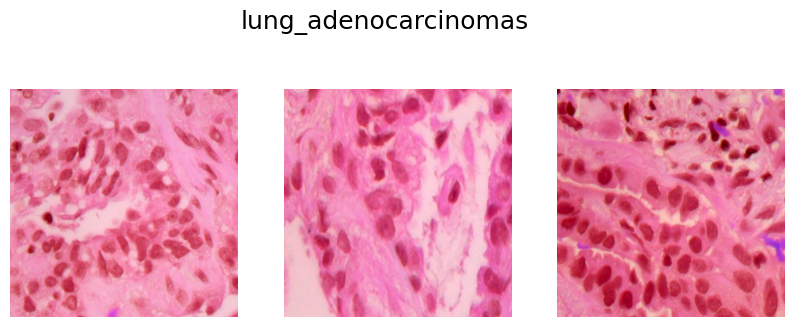

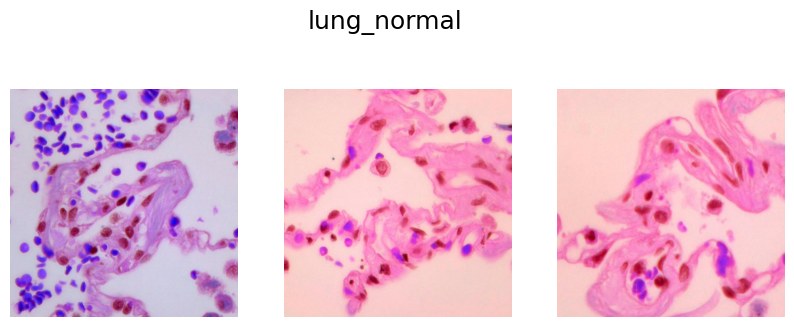

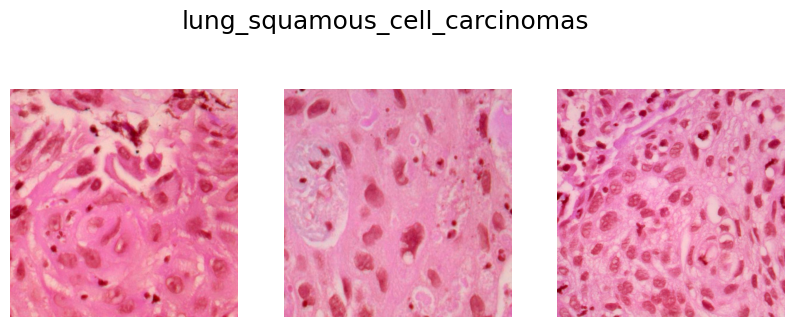

In [ ]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    images = os.listdir(path)

    # Initialize a subplot with 1 row and 3 columns
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    fig.suptitle(f'{category}', fontsize=18)

    for i in range(3):
        # Randomly select an image
        img_name = images[np.random.randint(0, len(images))]
        img_path = os.path.join(path, img_name)
        img_array = cv2.imread(img_path)

        # Display the image
        ax[i].imshow(img_array)
        ax[i].axis('off')

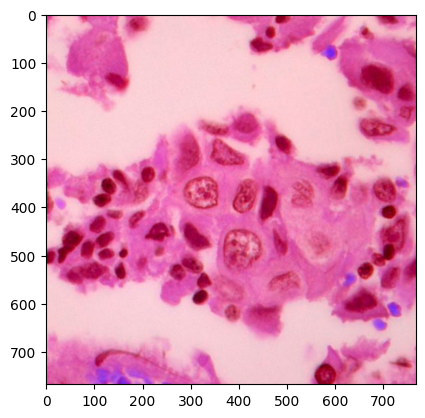

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)      #path to cats or dogs directory
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(img_array)
    plt.show()
    break
  break

In [ ]:
img_array.shape

(768, 768, 3)

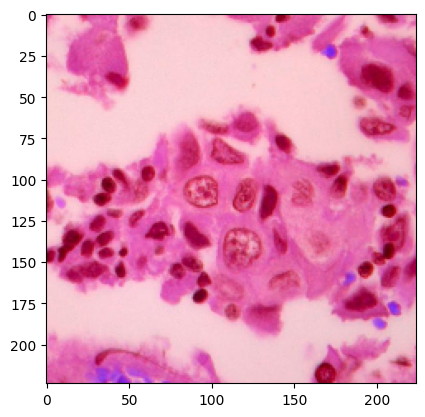

In [ ]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)

In [ ]:
new_array.shape

(224, 224, 3)

In [ ]:
# creating training data

training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [ ]:
len(training_data)

15000

In [ ]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [ ]:
# Converting the data type of X and y from list to numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)    # last value '3' for 'RGB'
y = np.array(y)


In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(f'X_train Length : {X_train.shape[0]}, X_train Image size : {X_train.shape[1:3]}, Channel Dimension : {X_train.shape[3]}')
print(f'X_test Length : {X_test.shape[0]}, X_test Image size : {X_test.shape[1:3]}, Channel Dimension : {X_test.shape[3]}')


X_train Length : 12000, X_train Image size : (224, 224), Channel Dimension : 3
X_test Length : 3000, X_test Image size : (224, 224), Channel Dimension : 3


In [ ]:
# vgg model
vgg = vgg16.VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (IMG_SIZE, IMG_SIZE, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# freezing the bottom (conv) layers
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# building the top (FC) layers
model = keras.Sequential([
    vgg,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax'),
])


In [ ]:
#compilation
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
hs=model.fit(X_train, y_train, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 118s 277ms/step - accuracy: 0.9011 - loss: 0.6048 - val_accuracy: 0.9677 - val_loss: 0.0824
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 87s 231ms/step - accuracy: 0.9721 - loss: 0.0737 - val_accuracy: 0.9760 - val_loss: 0.0614
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 233ms/step - accuracy: 0.9826 - loss: 0.0449 - val_accuracy: 0.9810 - val_loss: 0.0460
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 233ms/step - accuracy: 0.9822 - loss: 0.0492 - val_accuracy: 0.9793 - val_loss: 0.0547
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 87s 232ms/step - accuracy: 0.9859 - loss: 0.0383 - val_accuracy: 0.9747 - val_loss: 0.0691


In [ ]:
# evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.9735 - loss: 0.0741
Model Accuracy : 97.46666550636292


In [ ]:
model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step


array([[1.7131049e-07, 1.8570140e-13, 9.9999988e-01],
       [4.2670650e-18, 1.0000000e+00, 5.3207396e-29],
       [6.5363906e-06, 1.2571891e-09, 9.9999344e-01],
       ...,
       [7.0902258e-03, 7.5121175e-06, 9.9290222e-01],
       [1.0622580e-06, 1.7480873e-11, 9.9999893e-01],
       [2.8572256e-10, 1.4338575e-12, 1.0000000e+00]], dtype=float32)

In [ ]:
# first 5 true labels
y_test[:5]

array([2, 1, 2, 0, 1])

In [ ]:
pred = np.argmax(model.predict(X_test), axis = -1)


In [ ]:
# first 5 predicted labels
pred[:5]


In [ ]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and validation accuracy with enhancements
plt.figure(figsize=(8, 5))
plt.plot(h['accuracy'], label='Training Accuracy', marker='o', linestyle='-')
plt.plot(h['val_accuracy'], label='Validation Accuracy', marker='s', linestyle='--')

# Titles and Labels
plt.title("Training vs Validation Accuracy", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Grid and Legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


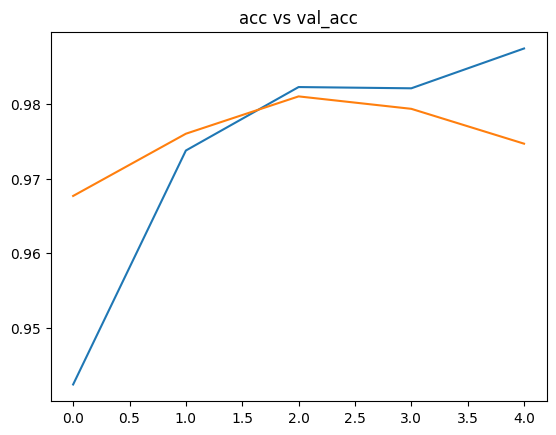

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title("acc vs val_acc")
plt.show()

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1037
           1       1.00      1.00      1.00       970
           2       0.93      1.00      0.96       993

    accuracy                           0.97      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.97      0.97      3000



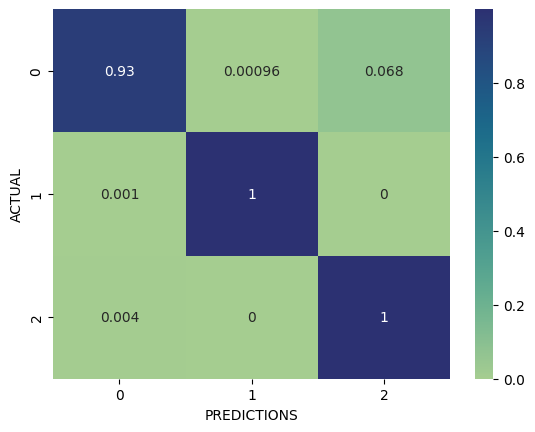

In [ ]:
#confusion matrix
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest');
plt.xlabel('PREDICTIONS');
plt.ylabel('ACTUAL');